__Lab 01 - Analysis__

Student Names: [Jwala Sri HAri Badam and Ganesh Veluru]

Group Number: [3]

# Setup

Import the all these python libraries:

In [2]:
import numpy as np
import scipy.spatial as spatial
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

print("✔️ OK to continue!")

✔️ OK to continue!


# Load Responses

Use `np.load()` to load your resp files. Make sure to load all 6 responses into 6 seperate lists or numpy arrays.

In [3]:
#Loading data From FPGA-0 Responses

data = np.load("../Responses/fpga0_resp0_50k_grad.npz")
fpga0_resp0 = data['response']

data = np.load("../Responses/fpga0_resp1_50k_grad.npz")
fpga0_resp1 = data['response']

data = np.load("../Responses/fpga0_resp2_50k_grad.npz")
fpga0_resp2 = data['response']

#Loading data from FPGA-1 Responses

data = np.load("../Responses/fpga1_resp0_50k_grad.npz")
fpga1_resp0 = data['response']

data = np.load("../Responses/fpga1_resp1_50k_grad.npz")
fpga1_resp1 = data['response']


data = np.load("../Responses/fpga1_resp2_50k_grad.npz")
fpga1_resp2 = data['response']


# print(fpga0_resp0)
print("✔️ OK to continue!")

✔️ OK to continue!


# Computer: Intra-chip HD

## Intra-chip HD for FPGA0
Compute the intra-chip HD for FPGA 0 and append them to a list.

Use `spatial.distance.pdist()` with `metric="hamming"` to compute the pairwise Hamming Distance (HD). Read more: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist

In [4]:
x0=fpga0_resp0
y0=fpga0_resp1
z0=fpga0_resp2

#gets pairwaise HD between x,y,x
#pairwise_hd = spatial.distance.pdist([list(x),list(y),list(z)], metric="hamming")

#List to store all pairwise hamming distances for FPGA-0 responses
intra_HD_fpga0=[]

#loop calculates the pairwise hamming distance between 3 responses of FPGA-0
for i in range(len(x0)):
    pairwise_hd_fpga0 = spatial.distance.pdist([list(x0[i]),list(y0[i]),list(z0[i])], metric="hamming")
    intra_HD_fpga0.append(pairwise_hd_fpga0)
    
# converting list to numpy array with HD probabilities
intra_HD_fpga0 = np.array(intra_HD_fpga0)

# Converting HD probabilities into percentages
intra_HD_fpga0 = intra_HD_fpga0*100
print("✔️ OK to continue!")

✔️ OK to continue!


## Intra-chip HD for FPGA1
Compute the intra-chip HD for FPGA 1 and append them to another list.

In [5]:
# Example:
x1=fpga1_resp0
y1=fpga1_resp1
z1=fpga1_resp2

# gets pairwaise HD between x,y,z
# pairwise_hd = spatial.distance.pdist([list(x),list(y),list(z)], metric="hamming")

#List to store all pairwise hamming distances for FPGA-0 responses
intra_HD_fpga1=[]

#loop calculates the pairwise hamming distance between 3 responses of FPGA-1
for i in range(len(x1)):
    pairwise_hd_fpga1 = spatial.distance.pdist([list(x1[i]),list(y1[i]),list(z1[i])], metric="hamming")
    intra_HD_fpga1.append(pairwise_hd_fpga1)

# converting list to numpy array with HD probabilities
intra_HD_fpga1 = np.array(intra_HD_fpga1)

# Converting HD probabilities into percentages
intra_HD_fpga1 = intra_HD_fpga1*100
print("✔️ OK to continue!")

✔️ OK to continue!


# Compute: Inter-chip HD

Compute the inter-chip HD between FPGA0 and FPGA1 and append them to another list.

In [6]:
x0=fpga0_resp0
x1=fpga1_resp0


#List to store the hamming distance between two responses
inter_HD = []

#loop calculates the pairwise hamming distance between responses of FPGA-0 and FPGA-1
for i in range(len(x0)):
    pairwise_HD_inter = spatial.distance.pdist([list(x0[i]),list(x1[i])], metric="hamming")
    inter_HD.append(pairwise_HD_inter)

# converting list to numpy array with HD probabilities
inter_HD = np.array(inter_HD)

# Converting HD probabilities into percentages
inter_HD = inter_HD*100

print("✔️ OK to continue!")

✔️ OK to continue!


# Statistical Results

Prints the following stats values for each list (intra-chip HD for FPGA0, for FPGA1, and inter-chip HD): min, max, average, and standard deviation (StD). NumPy have functions to compute all these.

Also, print the sample size (n) of our collected data (i.e., the length of each list).

In [7]:
def summary(np_arr):
    '''
        Input : Numpy array
        output : Summary DataFrame
    '''
    df= pd.DataFrame(np_arr)
    df = df.describe().round(3)
    df = df.loc[['min','max','mean','std']]
    return df

In [9]:
# intra-chip HD for FPGA0
print('{:=^80}'.format("Statistical Results for Intra-chip Hamming Distance for FPGA0"))
overall_min_HD_fpga0 = np.min(intra_HD_fpga0)
overall_max_HD_fpga0 = np.max(intra_HD_fpga0)
overall_std_HD_fpga0 = np.std(intra_HD_fpga0)


df_HD_fpga0= summary(intra_HD_fpga0)

# Changing the columns name to 'XY','XZ','YZ'
# XY represents pairwise HD between fpga0_resp0 and fpga0_resp1 similarly XZ and YZ.
df_HD_fpga0.columns = ['XY','XZ','YZ']
overall_avg_HD_fpga0 = (sum(df_HD_fpga0.loc[['mean']].values[0])/3).round(3)

print("Overall Minimum value:", overall_min_HD_fpga0)
print("Overall Maximum value:", overall_max_HD_fpga0)
print("Overall Standard Deviation value:", overall_std_HD_fpga0.round(3))
print("Overall Average value:", overall_avg_HD_fpga0,"\n")
print(df_HD_fpga0)

print("\n\n")



# intra-chip HD for FPGA1
print('{:=^80}'.format("Statistical Results for Intra-chip Hamming Distance for FPGA1"))
overall_min_HD_fpga1 = np.min(intra_HD_fpga1)
overall_max_HD_fpga1 = np.max(intra_HD_fpga1)
overall_std_HD_fpga1 = np.std(intra_HD_fpga1)

df_HD_fpga1= summary(intra_HD_fpga1)
df_HD_fpga1.columns = ['XY','XZ','YZ']
overall_avg_HD_fpga1 = (sum(df_HD_fpga1.loc[['mean']].values[0])/3).round(3)

print("Overall Minimum value:", overall_min_HD_fpga1)
print("Overall Maximum value:", overall_max_HD_fpga1)
print("Overall Standard Deviation value:", overall_std_HD_fpga1.round(3))
print("Overall Average value:", overall_avg_HD_fpga1,"\n")
print(df_HD_fpga1)

print("\n\n")


# Inter-chip HD between FPGA0, FPGA1
print('{:=^80}'.format("Statistical Results for Inter-chip HD between FPGA0, FPGA1"))

df_inter_HD_50k =  summary(inter_HD)
df_inter_HD_50k.columns = ['Inter HD 50k']
print(df_inter_HD_50k)

=========Statistical Results for Intra-chip Hamming Distance for FPGA0==========
Overall Minimum value: 0.0
Overall Maximum value: 56.25
Overall Standard Deviation value: 2.392
Overall Average value: 0.426 

          XY      XZ      YZ
min    0.000   0.000   0.000
max   50.000  56.250  56.250
mean   0.446   0.443   0.388
std    2.466   2.424   2.282



=========Statistical Results for Intra-chip Hamming Distance for FPGA1==========
Overall Minimum value: 0.0
Overall Maximum value: 56.25
Overall Standard Deviation value: 2.191
Overall Average value: 0.342 

          XY      XZ      YZ
min    0.000   0.000   0.000
max   56.250  50.000  50.000
mean   0.344   0.356   0.327
std    2.197   2.278   2.094



===========Statistical Results for Inter-chip HD between FPGA0, FPGA1===========
      Inter HD 50k
min          0.000
max         62.500
mean         3.994
std          7.042


# Plots

Plot and save (as PDF) each list (intra-chip HD for FPGA0, for FPGA1, and inter-chip HD) as a vertical bar graph. Make sure to format the plots with adequate size, title, axis labels, ... (see the Tutorial-01-Python).

To generate vertical bar graphs, use `plt.bar()`. Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

Or use `plt.hist()` with same size bins. Read more: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

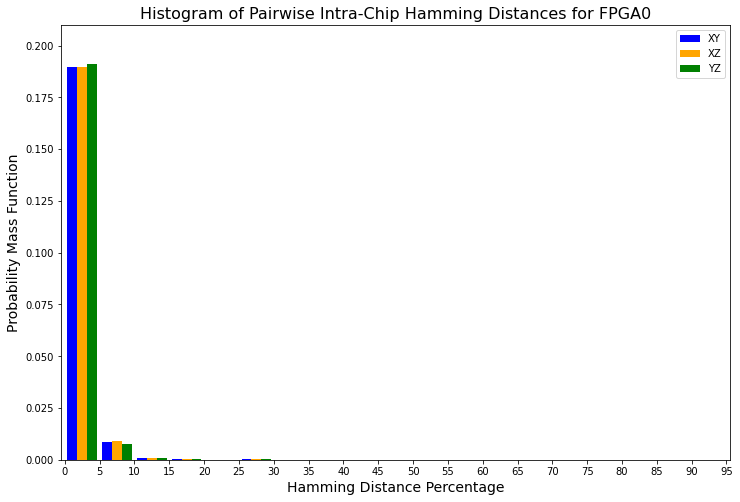

In [10]:
# Histogram of Pairwise Intra-Chip Hamming Distances (APUF) for FPGA0

plt.figure(figsize=(12, 8))

colors = ['blue', 'orange', 'green']
plt.hist(intra_HD_fpga0, bins=np.arange(0,100,5), histtype='bar',density=True, color=colors, label=["XY","XZ","YZ"],rwidth=0.85)
plt.legend(prop={'size': 10})
plt.xlabel('Hamming Distance Percentage',fontsize=14)
plt.ylabel('Probability Mass Function',fontsize=14)
plt.title('Histogram of Pairwise Intra-Chip Hamming Distances for FPGA0',fontsize=16)

plt.xticks(np.arange(0, 100, 5))
plt.margins(x=0.01, y=0.1)
plt.savefig('../Figures/PUF2_Pairwise_Intra-Chip_HD_FPGA0.pdf')
plt.show()

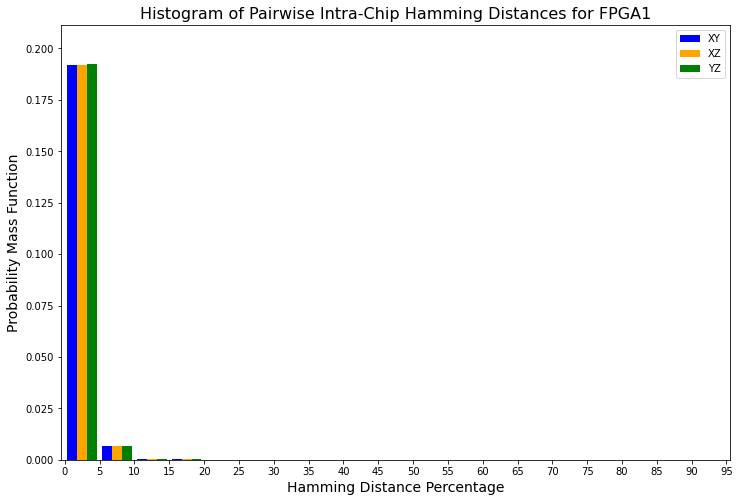

In [11]:
# Histogram of Pairwise Intra-Chip Hamming Distances (APUF) for FPGA1

plt.figure(figsize=(12, 8))

colors = ['blue', 'orange', 'green']
plt.hist(intra_HD_fpga1, bins=np.arange(0,100,5), histtype='bar',density=True, color=colors, label=["XY","XZ","YZ"],rwidth=0.85)
plt.legend(prop={'size': 10})
plt.xlabel('Hamming Distance Percentage',fontsize=14)
plt.ylabel('Probability Mass Function',fontsize=14)
plt.title('Histogram of Pairwise Intra-Chip Hamming Distances for FPGA1',fontsize=16)

plt.xticks(np.arange(0, 100, 5))
plt.margins(x=0.01, y=0.1)
plt.savefig('../Figures/PUF2_Pairwise_Intra-Chip_HD_FPGA1.pdf')
plt.show()

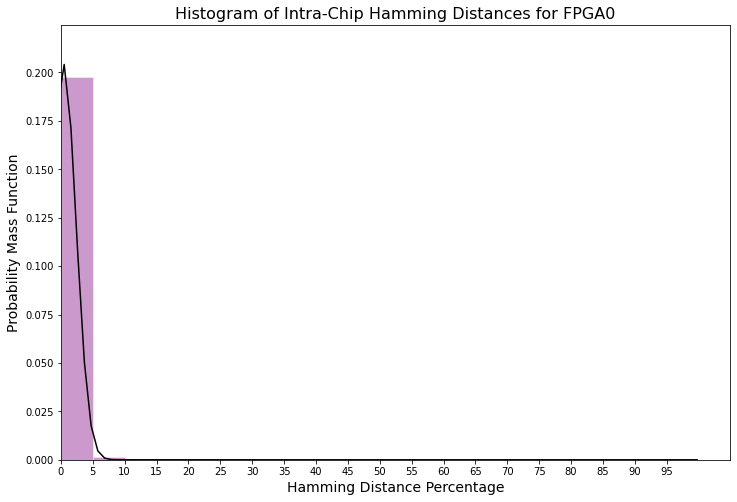

In [12]:
# Histogram of Intra-Chip Hamming Distance for FPGA0
HD_fpga0_avg = np.mean(intra_HD_fpga0, axis=1)


# Creating a histogram of average pairwise distances 
plt.figure(figsize=(12, 8))
plt.hist(HD_fpga0_avg, bins=np.arange(0,100,5),density=True,alpha=0.4, edgecolor='white',color='purple')

mean, std = norm.fit(HD_fpga0_avg) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Plotting the distribution curve
plt.plot(x, p,color='k', linewidth=1.5)

plt.xlabel('Hamming Distance Percentage',fontsize=14)
plt.ylabel('Probability Mass Function',fontsize=14)
plt.title('Histogram of Intra-Chip Hamming Distances for FPGA0',fontsize=16)

plt.xticks(np.arange(0, 100, 5))
plt.xlim(left =0)
plt.margins(x=0.01, y=0.1)
plt.savefig('../Figures/PUF2_Intra-Chip_HD_FPGA0.pdf')
plt.show()


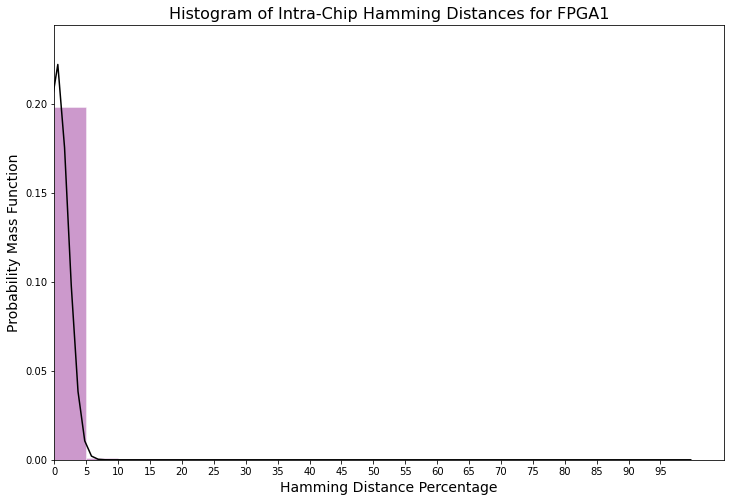

In [13]:
# Histogram of Intra-Chip Hamming Distance for FPGA1
HD_fpga1_avg = np.mean(intra_HD_fpga1, axis=1)


# Creating a histogram of average pairwise distances 
plt.figure(figsize=(12, 8))
plt.hist(HD_fpga1_avg, bins=np.arange(0,100,5),density=True,alpha=0.4, edgecolor='white',color='purple')
mean, std = norm.fit(HD_fpga1_avg) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Plotting the distribution curve
plt.plot(x, p, 'k', linewidth=1.5)

plt.xlabel('Hamming Distance Percentage',fontsize=14)
plt.ylabel('Probability Mass Function',fontsize=14)
plt.title('Histogram of Intra-Chip Hamming Distances for FPGA1',fontsize=16)

plt.xticks(np.arange(0, 100, 5))
plt.xlim(left =0)
plt.margins(x=0.01, y=0.1)
plt.savefig('../Figures/PUF2_Intra-Chip_HD_FPGA1.pdf')
plt.show()


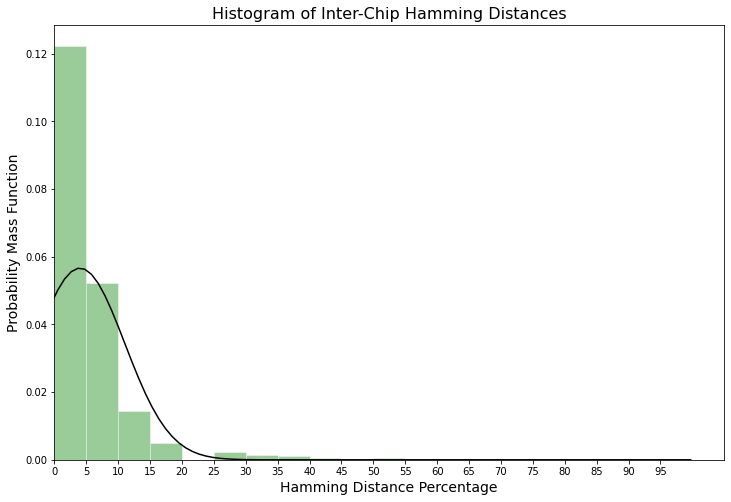

In [16]:
plt.figure(figsize=(12, 8))

# Creating a histogram for inter HD 
plt.hist(inter_HD, bins=np.arange(0,100,5),density = True,alpha=0.4, edgecolor='white',color='green')
mean, std = norm.fit(inter_HD) 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

plt.plot(x, p, 'k', linewidth=1.5)

plt.xlabel('Hamming Distance Percentage',fontsize=14)
plt.ylabel('Probability Mass Function',fontsize=14)
plt.title('Histogram of Inter-Chip Hamming Distances',fontsize=16)

plt.xticks(np.arange(0, 100, 5))
plt.xlim(left =0)
plt.savefig('../Figures/PUF2_Inter-Chip_HD.pdf')
plt.show()